In [ ]:
!pip install Augmentor

In [ ]:
!pip install split-folders

In [ ]:

import numpy as np
import cv2
import Augmentor
import matplotlib.pyplot as plt
import os
import splitfolders
from PIL import Image
from os import listdir
from os.path import splitext
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
scr_dir = "Brain_MRI/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
scr_dir = "drive/MyDrive/brain_tumor_dataset"

In [ ]:
columns = 2
rows = 2

In [ ]:
def get_path_subdir(root_folder):
    paths = []
    for folder in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder)
        if os.path.isdir(folder_path):
            paths.append(folder_path)
    return paths

In [ ]:
def pick_image(dir_path):
    file_paths = []
    for file in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file)
        if not os.path.isdir(file_path):
            file_paths.append(file_path)
    image_paths = set()
    while len(image_paths) < 4:
        image_paths.add(np.random.randint(0,len(file_paths)-1))
    image_paths = [file_paths[i] for i in list(image_paths)]
    return image_paths

In [ ]:
def plot_images(image_paths):
    fig = plt.figure(figsize=(15, 10))
    for idx in range(len(image_paths)):
        path = image_paths[idx]
        fig.add_subplot(rows, columns, idx+1)
        image = cv2.imread(path)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [ ]:
# Get path of all subdirectory amnd store in a list
dir_paths = get_path_subdir(scr_dir)

In [ ]:
# Pick four images randomly and plot it
image_paths = pick_image(dir_paths[0])

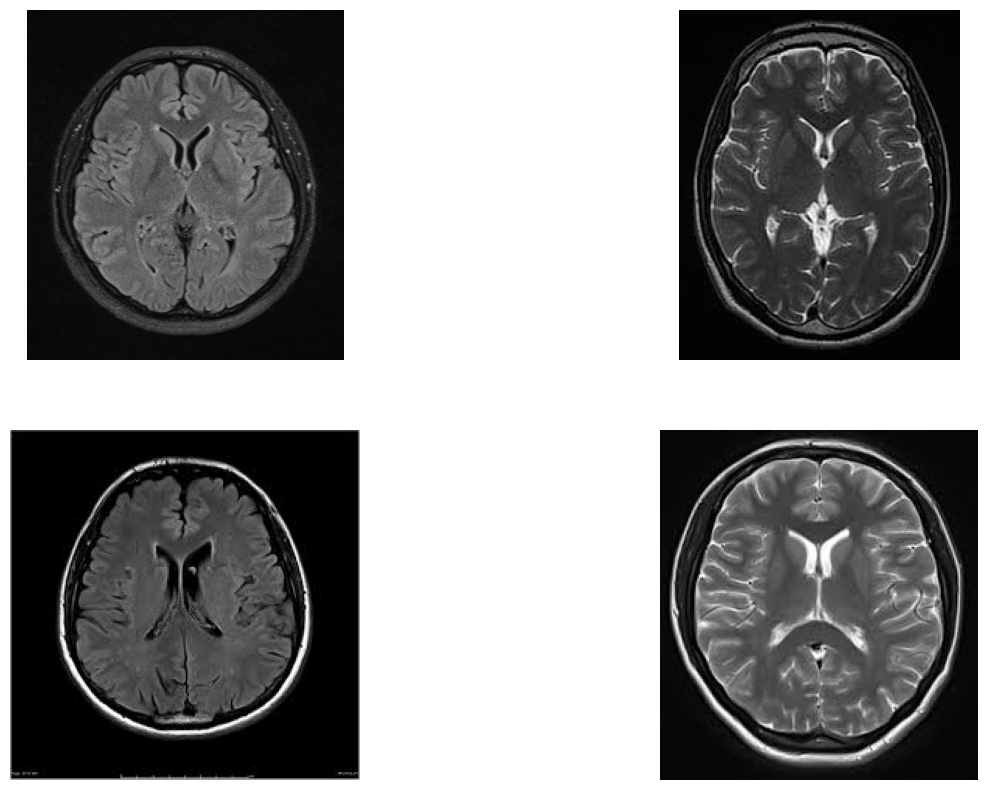

In [ ]:
plot_images(image_paths)

In [ ]:
# Pick four images randomly and plot it
image_paths = pick_image(dir_paths[1])

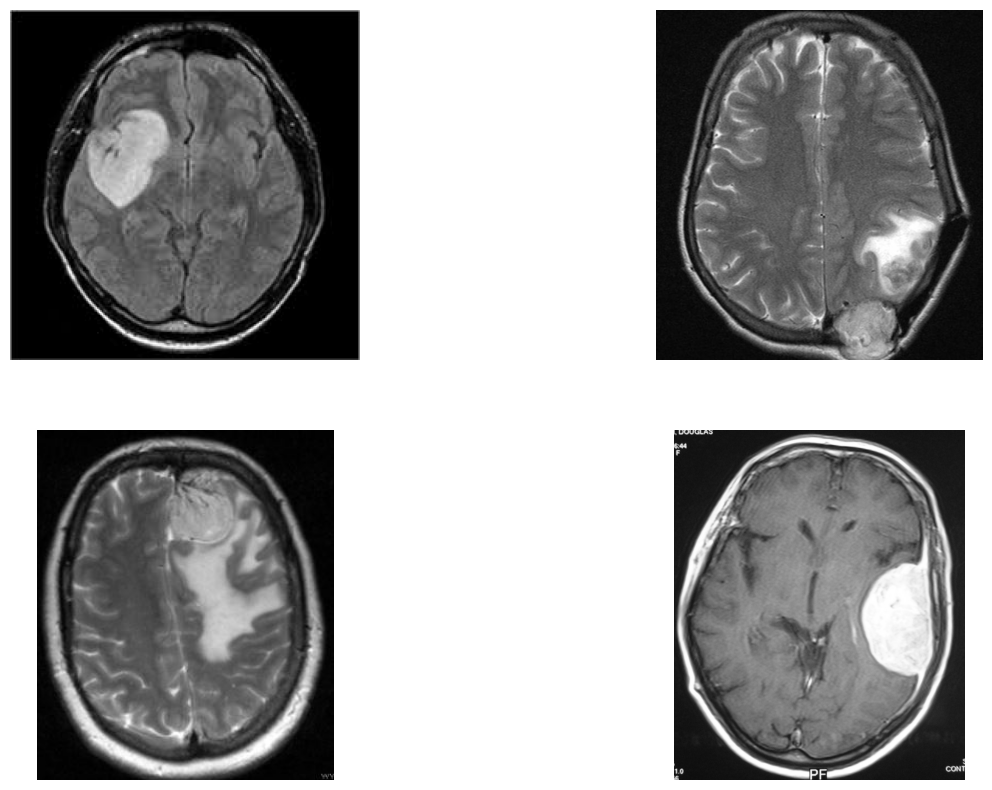

In [ ]:
plot_images(image_paths)

In [ ]:
# Get path of all subdirectory amnd store in a list
dir_paths = get_path_subdir(scr_dir)

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
# Plot number of images
dir_list = os.listdir(scr_dir)
dir_list.pop()    # Getting an empty folder
count = {}
for dir_name in dir_list:
    dir_path = os.path.join(scr_dir, dir_name)
    file_names = os.listdir(dir_path)
    temp_count = 0
    for fname in file_names:
        fpath = os.path.join(dir_path, fname)
        if os.path.isfile(fpath): temp_count += 1
    count[dir_name] = temp_count

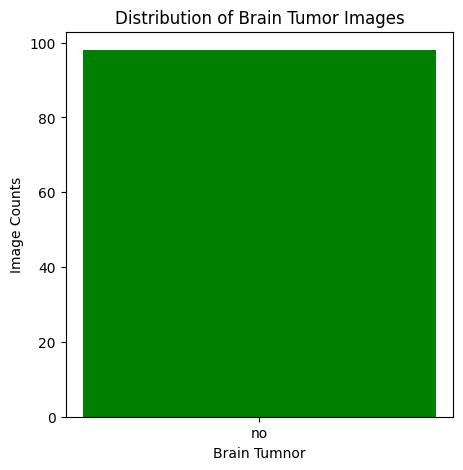

In [ ]:
courses = list(count.keys())
values = list(count.values())
fig = plt.figure(figsize = (5, 5))
plt.bar(courses, values, color ='green', width = 0.4)
plt.xlabel("Brain Tumnor")
plt.ylabel("Image Counts")
plt.title("Distribution of Brain Tumor Images")
plt.show()

In [ ]:
splitfolders.ratio(scr_dir, output="data", seed=10, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 253 files [00:50,  5.00 files/s] 


In [ ]:
def get_augmentor(source_folder, dest_folder):
    # Create a pipeline
    augmentor = Augmentor.Pipeline(source_folder, dest_folder, save_format='jpg')
    # Rotation
    augmentor.rotate(probability=0.5, max_left_rotation=3, max_right_rotation=3)
    # Flip
    augmentor.flip_left_right(probability=0.3)
    augmentor.flip_top_bottom(probability=0.3)
    augmentor.rotate90(probability=0.3)
    augmentor.rotate180(probability=0.3)
    augmentor.rotate270(probability=0.3)
    # Skew
    augmentor.skew_tilt(probability=0.3)
    augmentor.skew_left_right(probability=0.3)
    augmentor.skew_top_bottom(probability=0.3)
    augmentor.skew_corner(probability=0.3)
    augmentor.skew(probability=0.5)
    # Mirror
    augmentor.flip_left_right(probability=0.5)
    augmentor.flip_top_bottom(probability=0.3)
    augmentor.flip_random(probability=0.3)

    # Random Brightness
    augmentor.random_brightness(probability = 0.5, min_factor=0.4, max_factor=0.9)
    # Random Contrast
    augmentor.random_contrast(probability=0.5, min_factor=0.9, max_factor=1.4)
    # Random Distortion
    augmentor.random_distortion(probability=0.5, grid_width=3, grid_height=3, magnitude=3)
    # Random Erasing
    augmentor.random_erasing(probability=0.5, rectangle_area=0.2)
    # Zoom
    augmentor.zoom(probability=0.7, min_factor=1.1, max_factor=1.5)
    return augmentor

In [ ]:
# Create a folder to store augmented data
os.mkdir("augmented-data")

In [ ]:
# Convert all images to .jpg
data_path = os.path.join(os.getcwd(), "data")
for dir_path in os.listdir(data_path):
    folder_path = os.path.join(data_path, dir_path)
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            filename, extension = file_path.split('.')
            try:
                img = Image.open(file_path)
                if os.path.exists(file_path):
                    os.remove(file_path)
                img.save(filename + ".jpg")
            except:
                print("Cannot convert image with name ",file_path)
                if os.path.exists(file_path):
                    os.remove(file_path)

Cannot convert image with name  /content/data/test/no/no.jpg
Cannot convert image with name  /content/data/train/no/no 96.jpg
Cannot convert image with name  /content/data/train/no/No18.jpg
Cannot convert image with name  /content/data/train/no/No15.jpg
Cannot convert image with name  /content/data/train/no/no 98.jpg
Cannot convert image with name  /content/data/train/no/No17.jpg


In [ ]:
# Augment bran tumor images
src_folder = os.path.join(os.getcwd(), "data", "train", "yes")
dest_folder = os.path.join(os.getcwd(), "augmented_data", "yes")
augmentor = get_augmentor(src_folder, dest_folder)
augmentor.status()
num_of_samples = int(500)
augmentor.sample(num_of_samples)

Initialised with 123 image(s) found.
Output directory set to /content/augmented_data/yes.Operations: 19
	0: RotateRange (probability=0.5 max_left_rotation=-3 max_right_rotation=3 )
	1: Flip (probability=0.3 top_bottom_left_right=LEFT_RIGHT )
	2: Flip (probability=0.3 top_bottom_left_right=TOP_BOTTOM )
	3: Rotate 90 (probability=0.3 rotation=90 )
	4: Rotate 180 (probability=0.3 rotation=180 )
	5: Rotate 270 (probability=0.3 rotation=270 )
	6: Skew (probability=0.3 skew_type=TILT magnitude=1 )
	7: Skew (probability=0.3 skew_type=TILT_LEFT_RIGHT magnitude=1 )
	8: Skew (probability=0.3 skew_type=TILT_TOP_BOTTOM magnitude=1 )
	9: Skew (probability=0.3 skew_type=CORNER magnitude=1 )
	10: Skew (probability=0.5 skew_type=RANDOM magnitude=1 )
	11: Flip (probability=0.5 top_bottom_left_right=LEFT_RIGHT )
	12: Flip (probability=0.3 top_bottom_left_right=TOP_BOTTOM )
	13: Flip (probability=0.3 top_bottom_left_right=RANDOM )
	14: RandomBrightness (probability=0.5 min_factor=0.4 max_factor=0.9 )
	15

Processing <PIL.Image.Image image mode=RGB size=350x272 at 0x7E5798995420>: 100%|██████████| 500/500 [00:36<00:00, 13.75 Samples/s]


In [ ]:
# Augment non bran tumor images
src_folder = os.path.join(os.getcwd(), "data", "train", "no")
dest_folder = os.path.join(os.getcwd(), "augmented_data", "no")
augmentor = get_augmentor(src_folder, dest_folder)
augmentor.status()
num_of_samples = int(500)
augmentor.sample(num_of_samples)

Initialised with 73 image(s) found.
Output directory set to /content/augmented_data/no.Operations: 19
	0: RotateRange (probability=0.5 max_left_rotation=-3 max_right_rotation=3 )
	1: Flip (probability=0.3 top_bottom_left_right=LEFT_RIGHT )
	2: Flip (probability=0.3 top_bottom_left_right=TOP_BOTTOM )
	3: Rotate 90 (probability=0.3 rotation=90 )
	4: Rotate 180 (probability=0.3 rotation=180 )
	5: Rotate 270 (probability=0.3 rotation=270 )
	6: Skew (probability=0.3 skew_type=TILT magnitude=1 )
	7: Skew (probability=0.3 skew_type=TILT_LEFT_RIGHT magnitude=1 )
	8: Skew (probability=0.3 skew_type=TILT_TOP_BOTTOM magnitude=1 )
	9: Skew (probability=0.3 skew_type=CORNER magnitude=1 )
	10: Skew (probability=0.5 skew_type=RANDOM magnitude=1 )
	11: Flip (probability=0.5 top_bottom_left_right=LEFT_RIGHT )
	12: Flip (probability=0.3 top_bottom_left_right=TOP_BOTTOM )
	13: Flip (probability=0.3 top_bottom_left_right=RANDOM )
	14: RandomBrightness (probability=0.5 min_factor=0.4 max_factor=0.9 )
	15: 

Processing <PIL.Image.Image image mode=RGB size=213x236 at 0x7E5798942290>: 100%|██████████| 500/500 [00:29<00:00, 16.95 Samples/s]


In [ ]:
import numpy as np
import cv2

def preprocess_image(image):
    # Convert to numpy array from tensor if needed
    image = np.array(image)

    # Check if the image is grayscale and convert to 3 channels
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Ensure the image is in the correct format (CV_8UC3)
    if image.dtype != np.uint8:
        image = cv2.convertScaleAbs(image)

    # Step 1: Denoising the image
    image_denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    # Step 2: Convert image to grayscale
    gray_image = cv2.cvtColor(image_denoised, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply a binary threshold
    _, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Step 4: Edge Detection using Canny
    edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

    # Step 5: Contour detection
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image for visualization
    contour_image = cv2.drawContours(image_denoised.copy(), contours, -1, (0, 255, 0), 2)

    # Step 6: Overlay edges on the image (for visualization)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    combined_image = cv2.addWeighted(contour_image, 0.8, edges_colored, 0.2, 0)

    # Step 7: Convert the final processed image to RGB format
    processed_image = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)

    # Convert the processed image to float32 and normalize
    processed_image = processed_image.astype('float32')

    return processed_image


In [ ]:
# Function to visualize preprocessed images
def visualize_preprocessed_images(generator):
    batch = next(generator)
    images, labels = batch
    plt.figure(figsize=(12, 6))
    for i in range(8):  # Show the first 8 images
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()


In [ ]:
# ImageDataGenerator with rescaling and custom preprocessing function
datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_image)

In [ ]:
# Folder paths
train_path = os.path.join(os.getcwd(), "data", "train")
val_path = os.path.join(os.getcwd(), "data", "val")
test_path = os.path.join(os.getcwd(), "data", "test")

In [ ]:
# Create data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(32, 32),
    batch_size=16,
    classes=['yes', 'no'],
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    val_path,
    target_size=(32, 32),
    batch_size=16,
    classes=['yes', 'no'],
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(32, 32),
    batch_size=16,
    classes=['yes', 'no'],
    class_mode='categorical'
)

Found 196 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


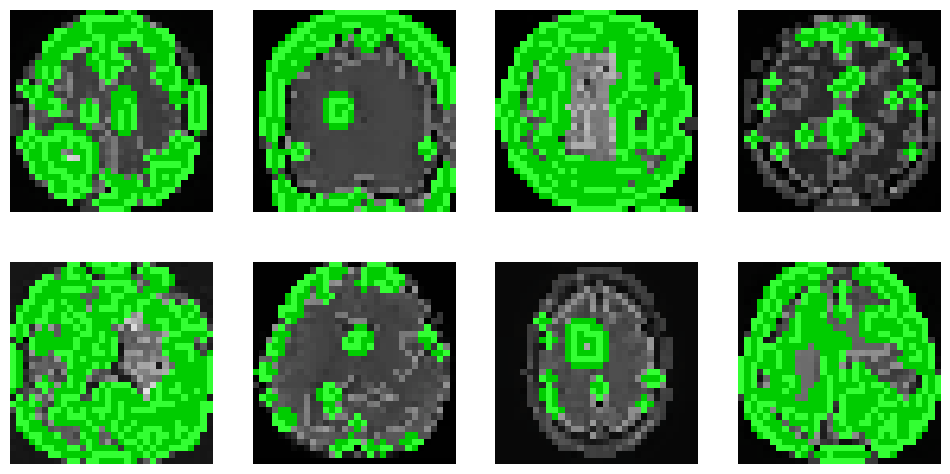

In [ ]:
# Visualize preprocessed images
visualize_preprocessed_images(train_generator)


In [ ]:
# Create a model
model = Sequential()
# First Layer
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', padding='valid', input_shape=(32,32,3)))
# Second Layer
model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))
# Third Layer
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'))
# Fourth Layer
model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))
# Fifth Layer
model.add(Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh', padding='valid'))
# Flatten feature arrays
model.add(Flatten())
# Add hidden dense layer
model.add(Dense(84, activation='tanh'))
# Add output layer
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,326 (239.55 KB)

 Trainable params: 61,326 (239.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# Create directory to save models
os.mkdir("models")

FileExistsError: [Errno 17] File exists: 'models'

In [ ]:
# Create ModelCheckpoint object
checkpointer = ModelCheckpoint(monitor='val_loss', mode = 'min',
                               filepath=os.path.join(os.getcwd(),'models','best_model.keras'),
                               verbose=1, save_best_only=True)
# Create EarlyStopping object
early_stopping_monitor = EarlyStopping(patience = 20)
callbacks_list = [checkpointer, early_stopping_monitor]

In [ ]:
hist = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks = callbacks_list)

Epoch 1/100
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5887 - loss: 0.6783
Epoch 1: val_loss improved from inf to 0.62691, saving model to /content/models/best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.5922 - loss: 0.6762 - val_accuracy: 0.6250 - val_loss: 0.6269
Epoch 2/100
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6496 - loss: 0.6406 
Epoch 2: val_loss did not improve from 0.62691
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.6486 - loss: 0.6407 - val_accuracy: 0.6250 - val_loss: 0.6301
Epoch 3/100
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6264 - loss: 0.6500
Epoch 3: val_loss improved from 0.62691 to 0.62049, saving model to /content/models/best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6360 - loss: 0.6435 - val_accuracy: 0.6250 - val_loss: 0.6205
Epoch 4/100
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6330 - loss: 0.6263 
Epoch 4: val_loss improved from 0.62049 to 0.61935, savi

Accuracy Plot: 


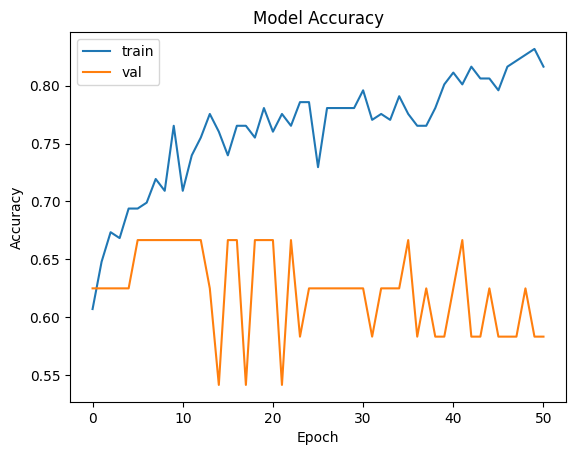

In [ ]:
print("Accuracy Plot: ")
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate model
score = model.evaluate(test_generator, verbose=1)
print("Model performance on test data: ")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.8510 - loss: 0.4363
Model performance on test data: 
Test loss: 0.4851038157939911
Test accuracy: 0.807692289352417
